# Load Basic Libraries
 Load some libaries to read and display the data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/youronlydimwit/Data_ScienceUse_Cases/main/Classification/Data/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Data Reformatting
Here we can see all the data types are textual (object). We need to convert all of this as numerics (in this case, integers)

In [3]:
# Missing data check function
def completeness_check(input_df):
    # Create a new DataFrame
    summary_df = pd.DataFrame(columns=['Column_Name', 'Data_Type', 'Missing_Data'])

    # Fill in the data
    summary_df['Column_Name'] = input_df.columns
    summary_df['Data_Type'] = input_df.dtypes.values
    summary_df['Missing_Data'] = input_df.isnull().sum().values

    return summary_df

completeness_check(df)

,Column_Name,Data_Type,Missing_Data
0,class,object,0
1,cap-shape,object,0
2,cap-surface,object,0
3,cap-color,object,0
4,bruises,object,0
5,odor,object,0
6,gill-attachment,object,0
7,gill-spacing,object,0
8,gill-size,object,0
9,gill-color,object,0


Here I am using my own script to display either a histogram or bar chart to the whole dataset.

In [4]:
import wget

In [5]:
wget.download('https://raw.githubusercontent.com/youronlydimwit/Data_ScienceUse_Cases/main/Scripts/data_desc_graph.py',
              'data_desc_graph.py')

100% [................................................................................] 1700 / 1700

'data_desc_graph.py'

In [6]:
from data_desc_graph import data_desc_graph

Execution of code

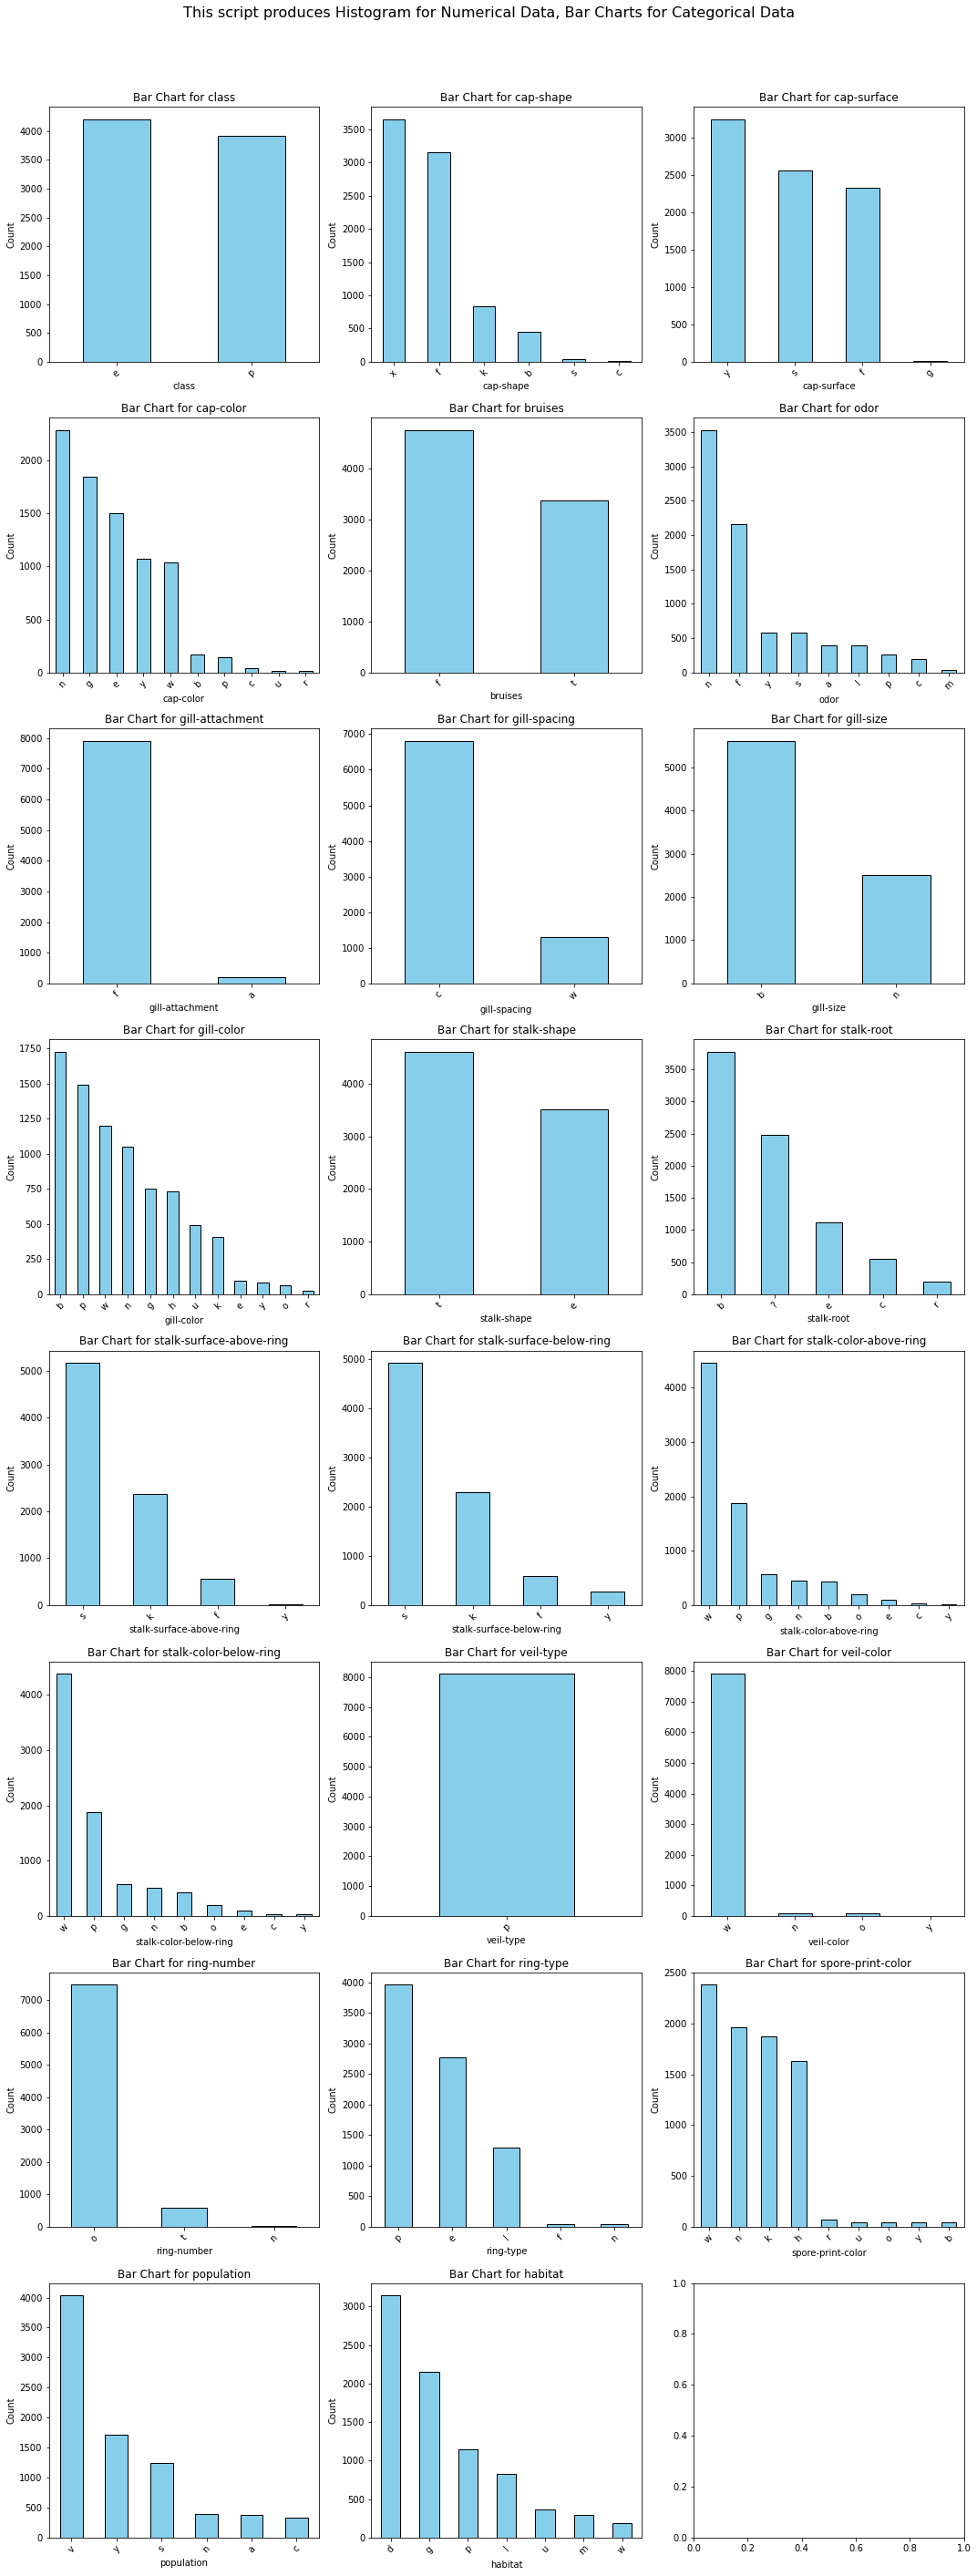

'Dependencies Satisfied'

In [7]:
data_desc_graph(df)

## Encoding the unique values from the dataset

In [8]:
# Using LabelEncoder function from sklearn
from sklearn.preprocessing import LabelEncoder

In [9]:
# Iterate every column
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [10]:
df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3


In [ ]:
# Run this code again to check if all the values have changed
# data_desc_graph(df)

# Research Questions:
- What types of machine learning models perform best on this dataset?
- Which features are most indicative of a poisonous mushroom?

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

*Note that veil-type only contain 1 unique values.

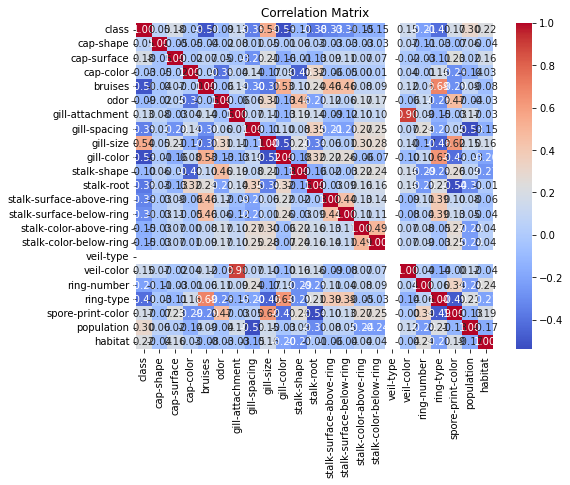

In [13]:
# To get a better look, let's run a correlation matrix
df_corr = df.corr()

# Plot the results
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## What types of machine learning models perform best on this dataset?

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
# Split the data into features (X) and labels (y)
X = df.drop(columns=['class'])
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary to store results
results = {'Model': [], 'F1_score': [], 'Accuracy': [], 'Precision': [], 'Recall': []}

In [18]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [19]:
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Store results in the dictionary
    results['Model'].append(model_name)
    results['F1_score'].append(f1)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

C:\Users\sang.yogi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
results_df

,Model,F1_score,Accuracy,Precision,Recall
0,Random Forest,1.000000,1.000000,1.000000,1.000000
1,Support Vector Machine,0.992278,0.992615,0.998705,0.985934
2,K-Nearest Neighbors,0.996178,0.996308,0.992386,1.000000
3,Logistic Regression,0.945153,0.947077,0.942748,0.947570
4,Decision Tree,1.000000,1.000000,1.000000,1.000000
5,Naive Bayes,0.919671,0.921846,0.909887,0.929668
6,AdaBoost,1.000000,1.000000,1.000000,1.000000
7,Gradient Boosting,1.000000,1.000000,1.000000,1.000000


- **F1 Score** balances precision and recall, providing a single metric that considers both false positives and false negatives.
- **Accuracy** provides an overall measure of correct predictions but may not be suitable for imbalanced datasets.
- **Precision** focuses on minimizing false positives, useful when the cost of false positives is high.
- **Recall** focuses on minimizing false negatives, useful when the cost of false negatives is high.

# Which features are most indicative of a poisonous mushroom?

In [29]:
# Create an empty dictionary to store feature importance scores
feature_importance = {}

In [30]:
# Iterate through each model in the 'models' dictionary
for model_name, model in models.items():
    # Assuming RandomForestClassifier is used, adapt for other models
    if model_name == 'Random Forest':
        # Get feature importance from the trained model
        importances = model.feature_importances_

        # Map feature names to their importance scores
        feature_importance[model_name] = dict(zip(X.columns, importances))

In [31]:
# Convert the dictionary to a DataFrame for better visualization
feature_importance_df = pd.DataFrame(feature_importance).T

In [32]:
feature_importance_df.head()

,bruises,cap-color,cap-shape,cap-surface,gill-attachment,gill-color,gill-size,gill-spacing,habitat,odor,...,ring-type,spore-print-color,stalk-color-above-ring,stalk-color-below-ring,stalk-root,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,veil-color,veil-type
Random Forest,0.05007,0.013889,0.004782,0.008458,0.002411,0.113684,0.146035,0.047978,0.033642,0.134474,...,0.066536,0.102494,0.011799,0.018804,0.064496,0.021023,0.043097,0.046428,0.002559,0.0


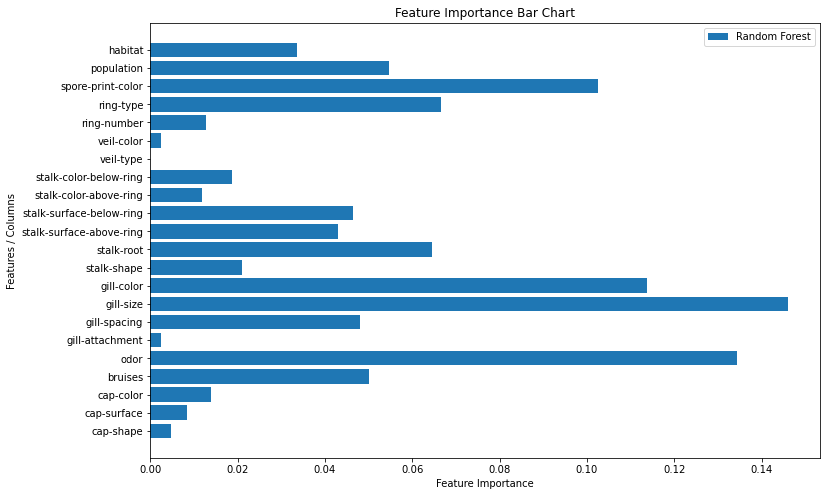

In [34]:
# Plot the feature importance for each feature / column
plt.figure(figsize=(12, 8))
for model_name, model_importance in feature_importance.items():
    plt.barh(list(model_importance.keys()), list(model_importance.values()), label=model_name)

plt.xlabel('Feature Importance')
plt.ylabel('Features / Columns')
plt.title('Feature Importance Bar Chart')
plt.legend()
plt.show()